# The Relationship Between Suicide Rates and the Recession in the United States 


### Meng Yuan


## Data source 
1. GDP data is from Bureau of Economic Analysis 
https://www.bea.gov/data/gdp/gdp-state
 
2. Suicide data is from Center for disease control and prevention
https://wonder.cdc.gov/Deaths-by-Underlying-Cause.html
 
3. map data is from Natural Earth
https://www.naturalearthdata.com/

## Set the enviorment

In [1]:
#import packages tools needed

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np  
import seaborn as sns

import geopandas                            
from shapely.geometry import Point          
from mpl_toolkits.axes_grid1 import make_axes_locatable

import patsy                           
import statsmodels.api as sm          
import statsmodels.formula.api as smf  


## Preliminary Result 

In [2]:
# Import GDP dataset from 2002 to 2016
gdp_pr = pd.read_excel("gdp_rate.xls", index_col = "Year", header = 5)
gdp_pr = gdp_pr.rename(columns={"Gross domestic product":"gdp_rate"})

In [3]:
# Import suicide dataset from 2002 to 2016 and calculate the suicide rate
suicide_pr = pd.read_excel("suicide_rate.xlsx", usecols=[1,3,4] , skipfooter = 58)
suicide_pr['crude'] = suicide_pr['Deaths'] / suicide_pr['Population'] *100000
suicide_pr['Suicide_Rate'] = suicide_pr['crude'].pct_change()*100 
suicide_pr = suicide_pr.set_index('Year')
suicide_pr = suicide_pr.loc["2002":"2016"]

In [4]:
# Merge the dataset into one table
merge_pr = pd.merge(left=gdp_pr, right=suicide_pr, on='Year', how='outer')
merge_pr = merge_pr.reset_index()

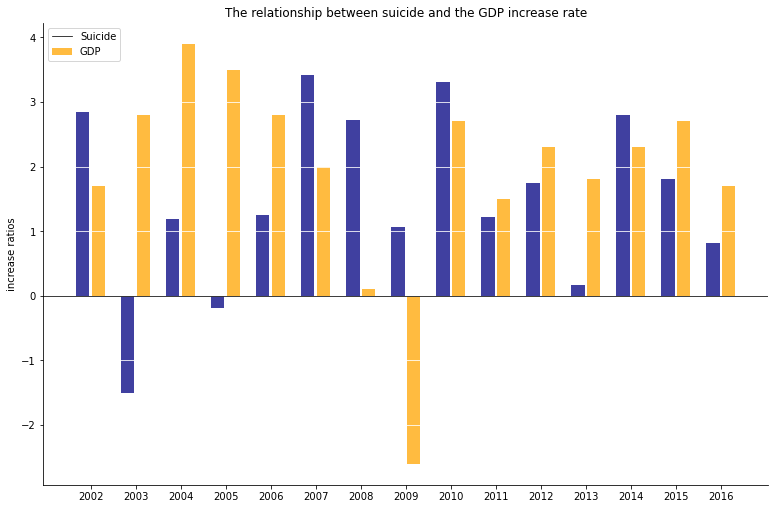

In [6]:
# Plot the bar chart
fig, ax = plt.subplots(figsize=(13,8.5))

positions = list(range(len(merge_pr)))

width = 0.3
gap = 0.05

positions_gdp = [p + 0.5*width + 0.5*gap for p in positions] 
bars_gdp = ax.bar(positions_gdp, merge_pr['gdp_rate'], width, color='orange', alpha=0.75) 

positions_suicide = [p - 0.5*width - 0.5*gap for p in positions] 
bars_suicide = ax.bar(positions_suicide, merge_pr['Suicide_Rate'], width, color='navy', alpha=0.75)

ax.axhline(y=0, color='black', linewidth=0.75)  

plt.xticks(positions, merge_pr['Year']) 
plt.legend(['Suicide','GDP'], loc='upper left')
plt.ylabel("increase ratios")
plt.title("The relationship between suicide and the GDP increase rate")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.grid(axis='y', color='white')
plt.savefig('proposal-new.svg')
plt.show()

## GDP+suicide dataset of 2008 and 2009

In [2]:
# Import the original dataset

gdp = pd.read_excel("gdp-state.xlsx")
suicide = pd.read_excel("suicide-state.xlsx")

In [3]:
gdp.head(2)

,Year,GeoName,GDP
0,2008,Alabama,-1.087710
1,2008,Alaska,-0.906595


In [4]:
suicide.head(2)

,Year,GeoName,State Code,Deaths,Population,Crude Rate,suicide
0,2008,Alabama,1,602,4718206,12.8,0.787402
1,2008,Alaska,2,169,687455,24.6,12.328767


In [5]:
# Merge GDP and suicide rate into one dataframe
merge_1 = pd.merge(left = gdp, right = suicide, on=['Year','GeoName'], how='outer')

In [6]:
merge_1.head(2)

,Year,GeoName,GDP,State Code,Deaths,Population,Crude Rate,suicide
0,2008,Alabama,-1.087710,1,602,4718206,12.8,0.787402
1,2008,Alaska,-0.906595,2,169,687455,24.6,12.328767


In [7]:
# Split the table into the target year
merge_08 = merge_1[merge_1['Year'] == 2008]
merge_09 = merge_1[merge_1['Year'] == 2009]

In [8]:
print(merge_08.head(2))
print(merge_09.head(2))

   Year  GeoName       GDP  State Code  Deaths  Population  Crude Rate  \
0  2008  Alabama -1.087710           1     602     4718206        12.8   
1  2008   Alaska -0.906595           2     169      687455        24.6   

     suicide  
0   0.787402  
1  12.328767  
    Year  GeoName       GDP  State Code  Deaths  Population  Crude Rate  \
51  2009  Alabama -3.337582           1     673     4757938        14.1   
52  2009   Alaska  9.683506           2     143      698895        20.5   

      suicide  
51  10.156250  
52 -16.666667  


## Map dataset

In [9]:
# Import the map data from 
states = geopandas.read_file('cb_2018_us_state_5m/cb_2018_us_state_5m.shp')

In [10]:
states.head(2)

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,31,01779792,0400000US31,31,NE,Nebraska,00,198956658395,1371829134,"POLYGON ((-104.05351 41.15726, -104.05267 41.2..."
1,53,01779804,0400000US53,53,WA,Washington,00,172112588220,12559278850,"MULTIPOLYGON (((-122.32834 48.02134, -122.3217..."


In [12]:
states2 = states
states_test = states2.drop([39,47,48,49,51]) # only remove the island outside us. Their row numbers are 39,47,48,49,51.
states2 = states2.drop([27,55,39,47,48,49,51]) # Also remove Alaska and Hawaii. 55 - alaska  27 - hawaii

In [13]:
# Sort in order to convenient to check dataset
states_test = states_test.sort_values(by = ['STATEFP'])
states2 = states2.sort_values(by = ['STATEFP'])

In [14]:
states2.head(2)

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
8,01,01779775,0400000US01,01,AL,Alabama,00,131174048583,4593327154,"MULTIPOLYGON (((-88.04374 30.51742, -88.03661 ..."
28,04,01779777,0400000US04,04,AZ,Arizona,00,294198551143,1027337603,"POLYGON ((-114.79968 32.59362, -114.80939 32.6..."


## Merge 

In [16]:
# Merge the statistics data with map data
map_08_test = pd.merge(left = states_test, right = merge_08, left_on = ['NAME'], right_on = ['GeoName'], how = 'left')
map_08 = pd.merge(left = states2, right = merge_08, left_on = ['NAME'], right_on = ['GeoName'], how = 'left')
map_09 = pd.merge(left = states2, right = merge_09, left_on = ['NAME'], right_on = ['GeoName'], how = 'left')

In [18]:
map_09.shape

(49, 18)

In [19]:
print(map_08.head(2))
print(map_09.head(2))

  STATEFP   STATENS     AFFGEOID GEOID STUSPS     NAME LSAD         ALAND  \
0      01  01779775  0400000US01    01     AL  Alabama   00  131174048583   
1      04  01779777  0400000US04    04     AZ  Arizona   00  294198551143   

       AWATER                                           geometry  Year  \
0  4593327154  MULTIPOLYGON (((-88.04374 30.51742, -88.03661 ...  2008   
1  1027337603  POLYGON ((-114.79968 32.59362, -114.80939 32.6...  2008   

   GeoName      GDP  State Code  Deaths  Population  Crude Rate   suicide  
0  Alabama -1.08771           1     602     4718206        12.8  0.787402  
1  Arizona -0.86164           4     972     6280362        15.5 -6.060606  
  STATEFP   STATENS     AFFGEOID GEOID STUSPS     NAME LSAD         ALAND  \
0      01  01779775  0400000US01    01     AL  Alabama   00  131174048583   
1      04  01779777  0400000US04    04     AZ  Arizona   00  294198551143   

       AWATER                                           geometry  Year  \
0  45933271

## Map graph

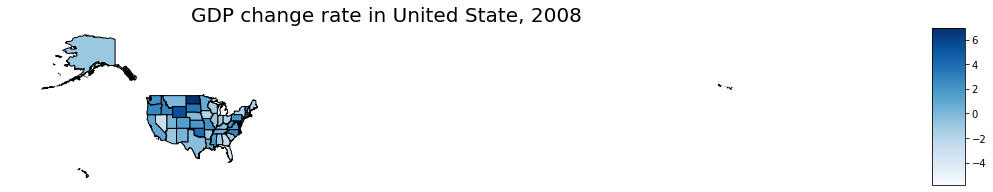

In [21]:
# Use the first dataset, looks not very well
fig, ax = plt.subplots(figsize=(20,20))

divider = make_axes_locatable(ax)
legend_ax = divider.append_axes('right', size='3%', pad=0.1)
map_08_test.plot(ax = ax, column='GDP', edgecolor='black',cmap = 'Blues', legend=True, cax=legend_ax)

ax.set_title('GDP change rate in United State, 2008', fontsize = 20)
ax.axis('off')
plt.savefig('map-not-good.svg',bbox_inches='tight')
plt.show()

In [ ]:
# Plot the GDP change when remove Alaska and Hawaii
fig, ax = plt.subplots(2,1,figsize=(30,30)) 

divider1 = make_axes_locatable(ax[0])
divider2 = make_axes_locatable(ax[1])
legend_ax1 = divider1.append_axes('right', size='5%', pad=0.1)
legend_ax2 = divider2.append_axes('right', size='5%', pad=0.1)
map_08.plot(ax = ax[0], column='GDP', edgecolor='black',cmap = 'coolwarm', legend=True, cax=legend_ax1)
map_09.plot(ax = ax[1], column='GDP', edgecolor='black',cmap = 'coolwarm', legend=True, cax=legend_ax2)

ax[0].set_title('GDP change rate in United State, 2008', fontsize = 30)
ax[1].set_title('GDP change rate in United State, 2009', fontsize = 30)
ax[0].axis('off')
ax[1].axis('off')

plt.savefig('map-gdp-1.0.svg',bbox_inches='tight')
plt.show()


In [ ]:
# Plot the suicide change when remove Alaska and Hawaii
fig, ax = plt.subplots(2,1,figsize=(30,30)) 

divider1 = make_axes_locatable(ax[0])
divider2 = make_axes_locatable(ax[1])
legend_ax1 = divider1.append_axes('right', size='5%', pad=0.1)
legend_ax2 = divider2.append_axes('right', size='5%', pad=0.1)
map_08.plot(ax = ax[0], column='suicide', edgecolor='black',cmap = 'coolwarm', legend=True, cax=legend_ax1)
map_09.plot(ax = ax[1], column='suicide', edgecolor='black',cmap = 'coolwarm', legend=True, cax=legend_ax2)

ax[0].set_title('Suicide change rate in United State, 2008', fontsize = 30)
ax[1].set_title('Suicide change rate in United State, 2009', fontsize = 30)
ax[0].axis('off')
ax[1].axis('off')

plt.savefig('map-suicide-2.0.svg',bbox_inches = 'tight')
plt.show()


```
fig, ax = plt.subplots(figsize=(50,50))

map_09.plot(ax = ax, column='GDP', edgecolor='black',cmap = 'Blues', legend=True)

ax.set_title('GDP 2009', fontsize = 50)
plt.axis('off')
plt.savefig('map-gdp-2009-2.0.svg')
plt.show()
```

```
fig, ax = plt.subplots(figsize=(20,20))

map_08.plot(ax = ax, column='suicide', edgecolor='black',cmap = 'Oranges', legend=True)

ax.set_title('suicide 2008', fontsize = 50)
plt.axis('off')
plt.savefig('map-suicide-2008-2.0.svg')
plt.show()
```

```
fig, ax = plt.subplots(figsize=(50,50))

map_09.plot(ax = ax, column='suicide', edgecolor='black',cmap = 'Oranges', legend=True)

ax.set_title('suicide 2009', fontsize = 50)
plt.axis('off')
plt.savefig('map-suicide-2009-2.0.svg')
plt.show()
```

## Bar chart

In [ ]:
# Chose the top 10 high suicide data
bar_08 = map_08.sort_values(by = ['suicide'])
bar_top10_08 = bar_08.tail(10)

In [ ]:
bar_top10_08.head(2)

In [ ]:
# Chose the top 10 high suicide data
bar_09 = map_09.sort_values(by = ['suicide'])
bar_top10_09 = bar_09.tail(10)

In [ ]:
# Plot the bar chart in 2008
fig, ax = plt.subplots(figsize=(13,8.5))

positions = list(range(len(bar_top10_08)))

width = 0.3
gap = 0.05

positions_gdp = [p + 0.5*width + 0.5*gap for p in positions] 
bars_gdp = ax.bar(positions_gdp, bar_top10_08['GDP'], width, color='orange', alpha=0.75) 

positions_suicide = [p - 0.5*width - 0.5*gap for p in positions] 
bars_suicide = ax.bar(positions_suicide, bar_top10_08['suicide'], width, color='navy', alpha=0.75)

ax.axhline(y=0, color='black', linewidth=0.75)  

plt.xticks(positions, bar_top10_08['NAME']) 
plt.legend(['Suicide','GDP'], loc='upper left')
plt.ylabel("increase ratios")
plt.title("Top 10 of The relationship between suicide and the GDP increase rate")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(axis='x', which='major', rotation=45)

ax.grid(axis='y', color='white')
plt.savefig('bar-08-1.0.svg',bbox_inches='tight')
plt.show()

In [ ]:
# Plot the bar chart in 2009
fig, ax = plt.subplots(figsize=(13,8.5))

positions = list(range(len(bar_top10_09)))

width = 0.3
gap = 0.05

positions_gdp = [p + 0.5*width + 0.5*gap for p in positions] 
bars_gdp = ax.bar(positions_gdp, bar_top10_09['GDP'], width, color='orange', alpha=0.75) 

positions_suicide = [p - 0.5*width - 0.5*gap for p in positions] 
bars_suicide = ax.bar(positions_suicide, bar_top10_09['suicide'], width, color='navy', alpha=0.75)

ax.axhline(y=0, color='black', linewidth=0.75)  

plt.xticks(positions, bar_top10_09['NAME']) 
plt.legend(['Suicide','GDP'], loc='upper left')
plt.ylabel("increase ratios")
plt.title("Top 10 of The relationship between suicide and the GDP increase rate")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(axis='x', which='major', rotation=45)

ax.grid(axis='y', color='white')
plt.savefig('bar-09-1.0.svg',bbox_inches='tight')
plt.show()

## Scatter  

In [ ]:
# Plot the scatter plot in 2008
fig, ax = plt.subplots(figsize=(13,8.5))
ax.scatter(merge_08['GDP'], merge_08['suicide'],color='tomato', s=30) 
plt.xlabel("GDP increase ratios")
plt.ylabel("Suicide rate increase ratios")
plt.title("Scatter plot between suicide and the GDP increase rate, 2008")
plt.savefig('scatter2.0-08.svg',bbox_inches='tight')
plt.show()

In [ ]:
# Plot the scatter plot in 2009
fig, ax = plt.subplots(figsize=(13,8.5))
ax.scatter(merge_09['GDP'], merge_09['suicide'],color='tomato', s=30) 
plt.xlabel("GDP increase ratios")
plt.ylabel("Suicide rate increase ratios")
plt.title("Scatter plot between suicide and the GDP increase rate, 2009")
plt.savefig('scatter2.0-09.svg',bbox_inches='tight')
plt.show()

In [ ]:
# Plot the scatter with regression line in 2008
fig, ax = plt.subplots(figsize=(13,8.5))

sns.regplot(x='GDP',                                       
            y='suicide',                                        
            data=merge_08,                                          
            ax = ax,                                         
            color = 'navy',                                  
            ci = 95)    
plt.xlabel("GDP increase ratios")
plt.ylabel("Suicide rate increase ratios")
plt.title("Regression plot between suicide and the GDP increase rate")
plt.savefig('scatter1.0-08.svg',bbox_inches='tight')
plt.show()

In [ ]:
# Plot the scatter with regression line in 2009
fig, ax = plt.subplots(figsize=(13,8.5))

sns.regplot(x='GDP',                                       
            y='suicide',                                        
            data=merge_09,                                          
            ax = ax,                                         
            color = 'navy',                                  
            ci = 95)    
plt.xlabel("GDP increase ratios")
plt.ylabel("Suicide rate increase ratios")
plt.title("Regression plot between suicide and the GDP increase rate")
plt.savefig('scatter1.0-09.svg',bbox_inches='tight')
plt.show()

```
fig, ax = plt.subplots(figsize=(13,8.5))

sns.regplot(x='GDP', y='suicide', data=merge_1,   
            ax = ax,                                   # an axis object
            #scatter_kws={'s': merge_1['suicide']},      # make the marker proportional to population            
            #scatter_kws={'s': 25},
            color = 'blue',                            # make it blue
            ci = 95,                                   # confidence interval: pass it the percent
            logx = True)                               # semi-log regression

plt.xlabel("GDP increase ratios")
plt.ylabel("Suicide rate increase ratios")
plt.title("Regression plot between suicide and the GDP increase rate")
plt.savefig('scatter3.0.svg',bbox_inches='tight')
plt.show()
```

## OLS

In [ ]:
# Run OLS regression on two vairables
ols_01 = smf.ols('GDP ~ suicide', data = merge_1).fit()

In [ ]:
ols_08 = smf.ols('GDP ~ suicide', data = merge_08).fit()

In [ ]:
ols_09 = smf.ols('GDP ~ suicide', data = merge_09).fit()

In [ ]:
print(ols_01.summary())

In [ ]:
print(ols_08.summary())

In [ ]:
print(ols_09.summary())